## 0. Dicionário dos dados

[Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

## 1. Aquisição dos Dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
## importando databases
data = pd.read_csv("data.csv")
data_years = pd.read_csv("data_by_year.csv")
data_genres = pd.read_csv("data_by_genres.csv")

## 2. Pré-processamento dos Dados

In [3]:
data[data["artists"] == "Eminem"].head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady
7,0.507,2000,0.03710,Eminem,0.780,404107,0.768,1,3UmaczJpikHgJFyBTAJVoz,0.000002,6,0.5180,-4.325,0,Stan,78,0.2380,80.063,Eminem - Stan
22,0.315,2000,0.14400,Eminem,0.785,290427,0.871,1,23wfXwnsPZYe5A1xXRHb3J,0.000000,4,0.3090,-2.692,0,The Way I Am,71,0.2650,87.248,Eminem - The Way I Am
34,0.677,2000,0.15500,Eminem,0.897,264400,0.559,1,5eGEc27nnhtmcOh6RC890a,0.000127,11,0.2960,-8.268,1,Kill You,69,0.3790,106.991,Eminem - Kill You
46,0.779,2000,0.07830,Eminem,0.918,288200,0.586,1,7lgvU7WnwcNZ8dbGUz8yhP,0.000000,1,0.1450,-2.890,1,Bitch Please II,69,0.1330,95.517,Eminem - Bitch Please II
107,0.573,2000,0.12700,Eminem,0.810,319600,0.724,1,18ohWhzbMCynq5QJ68ifkW,0.000000,4,0.3060,-6.153,0,Criminal,60,0.2680,101.941,Eminem - Criminal
111,0.268,2000,0.03610,Eminem,0.729,321267,0.759,1,3X4Oz9LjhhtgyOhVNlfoYa,0.000000,11,0.0694,-3.177,0,Marshall Mathers,59,0.1270,95.935,Eminem - Marshall Mathers
116,0.851,2000,0.01460,Eminem,0.878,309760,0.595,1,3xVtc7PB4V3AqAfq4Iahli,0.000068,11,0.3280,-3.924,0,I'm Back,59,0.2030,89.995,Eminem - I'm Back
260,0.100,2002,0.06220,Eminem,0.548,297787,0.847,1,4xkOaSrkexMciUUogZKVTS,0.000000,1,0.0816,-3.237,1,'Till I Collapse,84,0.1860,171.447,Eminem - 'Till I Collapse
261,0.662,2002,0.00286,Eminem,0.908,290320,0.669,1,7lQ8MOhq6IN2w8EYcFNSUk,0.000000,7,0.2370,-2.827,1,Without Me,83,0.0738,112.238,Eminem - Without Me


In [4]:
data_years.head(1)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2


In [5]:
data_genres.head(1)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,160297.666667,0.071317,0.606834,0.3616,-31.514333,0.040567,75.3365,0.103783,27.833333,6


### Verificação de valores nulos

In [6]:
data.isnull().sum()
data.isna().sum()

data_years.isnull().sum()
data_years.isna().sum()

data_genres.isnull().sum()
data_genres.isna().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

### Tratando dados não utilizados

In [7]:
## verificando se todos os anos em data_years são usados em data
print(data["year"].unique())
print(data_years["year"].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]
[1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934
 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020]


In [8]:
## removendo anos não utilizados
data_years = data_years[data_years["year"]>=2000]
print(data_years["year"].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]


In [9]:
## resetando ids de data_years
data_years = data_years.reset_index()
data_years.head(1)

,index,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,79,1,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049,7


In [10]:
## removendo dados não úteis para a clusterização
data = data.drop(columns = ["key", "mode"])
data_years = data_years.drop(columns = ["mode", "key"])
data_genres = data_genres.drop(columns = ["mode", "key"])

## 3. Análise gráfica

In [11]:
import plotly.express as px

fig = px.line(data_years, x="year", y="loudness", markers=True, title="Variação do loudness de acordo com os anos:")
fig.show()

In [12]:
import plotly.express as px

fig = px.line(data_years, x="year", y="loudness", markers= True, title='Variação do loudness conforme os anos')
fig.show()

In [13]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=data_years['year'], y=data_years['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=data_years['year'], y=data_years['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=data_years['year'], y=data_years['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=data_years['year'], y=data_years['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=data_years['year'], y=data_years['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=data_years['year'], y=data_years['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=data_years['year'], y=data_years['speechiness'],
                    name='Speechiness'))

fig.show()


In [14]:
data.head(1)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,0.234,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow


<Axes: >

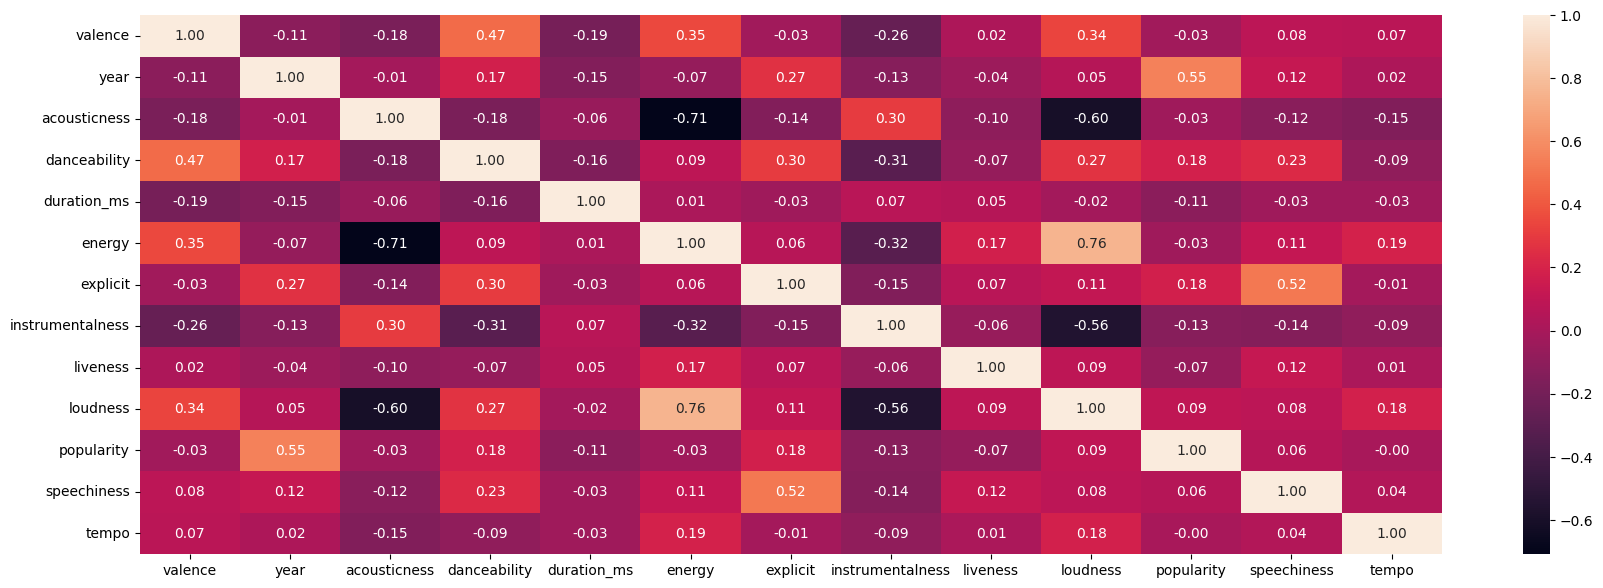

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corre = data.corr(numeric_only=True)

plt.figure(figsize=(21,7))
sns.heatmap(corre, annot=True, fmt=".2f")

## 4. Clusterização por música

### Transformar cada artista, que pode ter várias músicas, em uma coluna

In [16]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
columns_ohe = ohe.fit_transform(data[["artists"]]).toarray()
columns_ohe = pd.DataFrame(columns_ohe, columns=ohe.get_feature_names_out(["artists"]))

data_ohe = pd.concat([data.drop(columns = ["artists", "name", "artists_song", "id"]), columns_ohe], axis=1)
data_ohe.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,...,artists_Zara Larsson,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior
0,0.285,2000,0.00239,0.429,266773,0.661,0,0.000121,0.2340,-7.227,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,270507,0.806,1,0.000000,0.0771,-5.946,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,216880,0.864,0,0.000000,0.2090,-5.870,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,233933,0.865,0,0.000011,0.1680,-5.708,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,284200,0.661,1,0.000000,0.0454,-4.244,...,0,0,0,0,0,0,0,0,0,0


### Pipeline de padronização e redução de features

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline([("scaler", StandardScaler()), ("PCA", PCA(n_components=0.9, random_state=123))])
music_embedding_pca = pipeline.fit_transform(data_ohe)
projection_musics = pd.DataFrame(music_embedding_pca)

projection_musics.head(1)

,0,1,2,3,4,5,6,7,8,9,...,780,781,782,783,784,785,786,787,788,789
0,0.389584,-1.043954,-0.507847,2.2082,0.478497,0.162455,-0.593619,-0.479379,-2.706889,-1.383606,...,4.470825e-13,6.383539e-13,-1.250649e-12,-7.813505e-13,-1.213884e-13,9.240221e-13,1.133478e-12,8.385764e-13,6.322610e-13,7.214238e-14


### Aplicação do cluster

In [18]:
from sklearn.cluster import KMeans

kmeans_musics = KMeans(n_clusters = 100, random_state=123)
kmeans_musics.fit(projection_musics)

c:\Users\heady\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=100, random_state=123)

In [19]:
projection_musics["cluster"] = kmeans_musics.predict(projection_musics)

data["cluster"] = projection_musics["cluster"]

projection_musics["artists"] = data["artists"]
projection_musics["song"] = data["name"]
projection_musics["artists_song"] = data["artists_song"]

### Analisando o cluster

In [20]:
fig = px.scatter(projection_musics, 0, 1, color="cluster", hover_data="artists_song")
fig.show()

In [21]:
fig = px.scatter_3d(projection_musics, 0, 1, 2, color="cluster", hover_data="artists_song")
fig.update_traces(marker_size=2)
fig.show()

In [22]:
pipeline[1].explained_variance_.sum()

799.837243116648

In [23]:
pipeline[1].explained_variance_ratio_.sum()

0.9006732698264466

## 5. Recomendação da música

In [24]:
from sklearn.metrics.pairwise import euclidean_distances

### Escolhendo a música e pegando seu cluster

In [25]:
musica = "Ed Sheeran - Shape of You"

cluster = data[data["artists_song"] == musica]["cluster"].iloc[0]

### Pegando ids de músicas do mesmo cluster

In [26]:
musicas_semelhantes = projection_musics[projection_musics["cluster"] == cluster][[0, 1, 2, "artists_song"]]
musicas_semelhantes["id"] = data["id"]

### Obtendo os valores x, y e z da música (valores do PCA)

In [27]:
x_musica = projection_musics[projection_musics["artists_song"]==musica][0].iloc[0]
y_musica = projection_musics[projection_musics["artists_song"]==musica][1].iloc[0]
z_musica = projection_musics[projection_musics["artists_song"]==musica][2].iloc[0]

### Calculando a distância dessa música para as músicas semelhantes e ordenando

In [28]:
distancias = euclidean_distances(musicas_semelhantes[[0, 1, 2]], [[x_musica, y_musica, z_musica]])
musicas_semelhantes["distancia"] = distancias

musicas_recomendadas = musicas_semelhantes.sort_values(["distancia"]).head(10)

musicas_recomendadas

,0,1,2,artists_song,id,distancia
2463,-0.791392,1.819813,-2.696209,Ed Sheeran - Shape of You,7qiZfU4dY1lWllzX7mPBI3,0.000000
2942,-0.839080,1.868396,-2.637835,Marshmello - Be Kind (with Halsey),3Z8FwOEN59mRMxDCtb8N0A,0.089677
5244,-0.715561,1.715426,-2.469829,Khalid - Up All Night,1mpD5Q8IM32I4bF6eCpU74,0.260567
2941,-0.818418,1.710757,-2.455174,Conan Gray - Maniac,6KfoDhO4XUWSbnyKjNp9c4,0.265935
5366,-0.879060,1.562375,-2.713734,Justin Bieber - Intentions,364dI1bYnvamSnBJ8JcNzN,0.272520
5271,-0.779340,1.949313,-2.454096,Ed Sheeran - South of the Border (feat. Camila...,4vUmTMuQqjdnvlZmAH61Qk,0.274835
11527,-0.993417,1.840941,-2.504368,Anuel AA - Amanece,1LiN0Z98FkR1t0m8KmLcAH,0.279399
5411,-1.029655,1.716922,-2.807664,BLACKPINK - Pretty Savage,1XnpzbOGptRwfJhZgLbmSr,0.282450
5414,-0.889008,1.525595,-2.689176,Justin Bieber - Intentions (feat. Quavo),4umIPjkehX1r7uhmGvXiSV,0.310069
5193,-0.862732,1.579508,-2.883403,Alec Benjamin - Boy In The Bubble,60cYr5uuMoxvyuIx45rGEW,0.312853


## 6. Spotipy

**ATENÇÃO!**

Antes de rodar essa parte do código, você precisa fazer uma conta na API do Spotify e gerar suas próprias **client_id** e **client_secret**

### Configurando autorização API Spotify

In [29]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='localhost:8080',
        client_id = '',
        client_secret = '')

client_credentials_manager = SpotifyClientCredentials(client_id = '', client_secret = '')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

### Obtendo imagem do álbum

In [ ]:
## obtendo id da música para buscar na api
musica = "Ed Sheeran - Shape of You"
id = data[data["artists_song"] == musica]["id"].iloc[0]

In [ ]:
## buscando na api
track = sp.track(id)

url = track["album"]["images"][1]["url"]
name = track["name"]

name

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

## exibindo imagem
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize=10)
plt.show()

NameError: name 'url' is not defined

## 7. Recomendador Final

### Buscando os dados da playlist

In [ ]:
def obtemInfosPlaylist(playlist_id):
  urls = []
  names = []
  for id in playlist_id:
    track = sp.track(id)
    urls.append(track["album"]["images"][0]["url"])
    names.append(track["name"])
  return urls, names

### Gerando as imagens das músicas da playlist

In [ ]:
def visualizarSons(urls, names):
  plt.figure(figsize=(15,10))
  columns = 5

  for i, u in enumerate(urls):
    ax = plt.subplot(len(urls)//columns + 1, columns, i + 1)

    image = io.imread(u)

    plt.imshow(image)

    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_xlabel(names[i])

  plt.show()

### Fazendo uma função final

In [ ]:
def recomendados(musica):
  ## obtendo musicas recomendadas

  cluster = data[data["artists_song"] == musica]["cluster"].iloc[0]
  musicas_semelhantes = projection_musics[projection_musics["cluster"] == cluster][[0, 1, 2, "artists_song"]]
  musicas_semelhantes["id"] = data[data["cluster"]==cluster]["id"]

  x_musica = projection_musics[projection_musics["artists_song"] == musica][0].iloc[0]
  y_musica = projection_musics[projection_musics["artists_song"] == musica][1].iloc[0]
  z_musica = projection_musics[projection_musics["artists_song"] == musica][2].iloc[0]

  distancias = euclidean_distances(musicas_semelhantes[[0, 1]], [[x_musica, y_musica]])

  musicas_semelhantes["distancias"] = distancias

  musicas_recomendadas = musicas_semelhantes.sort_values(["distancias"]).head(10)

  playlist_id = musicas_recomendadas["id"]

  urls, nomes = obtemInfosPlaylist(playlist_id)
  visualizarSons(urls, nomes)

  return musicas_recomendadas

recomendados("Eminem - The Real Slim Shady")